In [1]:
from LSTM import *
from data_getter import *
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython import display
import pickle
import time

In [2]:
directory = 'D:/archive/tensors/'

In [3]:
device = 'cuda'

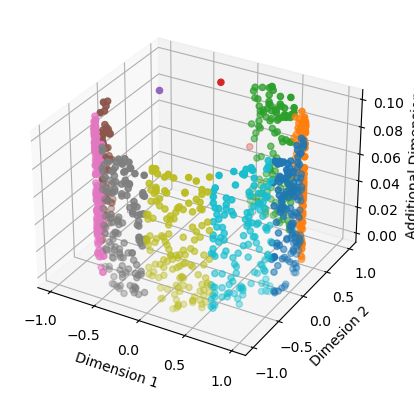

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
topics = torch.rand(10,3)
topics[:,2] /= 10
topics[:,0] = torch.cos(0.628*torch.arange(10))
topics[:,1] = torch.sin(0.628*torch.arange(10))
days =torch.randint(275,(1,1001))
embeddings = torch.zeros((1001,3))
embeddings[:,0] = torch.sin(6.28*days/365.0)
embeddings[:,1] = torch.cos(6.28*days/365.0)
embeddings[:,2] = torch.rand(1001)/10
diff = topics[torch.arange(10010)%10,:] - embeddings[torch.arange(10010)//10,:]
diff_sqrd = torch.sum(diff**2,dim=1)
label = torch.argmin(diff_sqrd.reshape((1001,10)),dim=1)
for topic in torch.arange(10):
    label[-1] = topic
    embeddings[-1,:] = topics[topic,:]
    data = embeddings[label==topic]
    ax.scatter(data[:,0],data[:,1],data[:,2])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimesion 2')
ax.set_zlabel('Additional Dimensions')
plt.savefig('fig.png')